In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

One important function of HR is to retain talent. High employee attrition in a company can result to financial cost, lower morale, decrease in producvity  and more. Therefore it's imperative for HR to be able to maintain a healthy employee attrition rate. With this, HR wants you to build a model that will predict if an employee will attrite (leave the company) or stay. By having this kind of model in the company, HR would be able to proactively retain talent and have a healthier attrition rate. 

They have provided you with a dataset which contains the following columns. Source from <a href="https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists">Kaggle</a>: 

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
hr_train_df = pd.read_csv("hr_job_datasci_train.csv")
hr_train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


The cell below shows you the columns with missing values, # of missing values and the unique values for each column.

In [4]:
columns_with_null = hr_train_df.columns[hr_train_df.isna().any()]
display(hr_train_df[columns_with_null].isnull().sum()/hr_train_df.shape[0])
display(hr_train_df[columns_with_null])
for c in columns_with_null:
    print(f"{c} {hr_train_df[c].unique()}")

gender                 0.235306
enrolled_university    0.020148
education_level        0.024011
major_discipline       0.146832
experience             0.003393
company_size           0.309949
company_type           0.320493
last_new_job           0.022080
dtype: float64

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...
19153,Male,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,Male,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


gender ['Male' nan 'Female' 'Other']
enrolled_university ['no_enrollment' 'Full time course' nan 'Part time course']
education_level ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
company_size [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job ['1' '>4' 'never' '4' '3' '2' nan]


## Fill the nan values with an 'unknown' tag (2pts)

In [20]:
hr_train_df[columns_with_null]=hr_train_df[columns_with_null].fillna('unknown')
display(hr_train_df.head())
for c in columns_with_null:
    print(f"{c} {hr_train_df[c].unique()}")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,unknown,No relevent experience,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0
3,33241,city_115,0.789,unknown,No relevent experience,unknown,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


gender ['Male' 'unknown' 'Female' 'Other']
enrolled_university ['no_enrollment' 'Full time course' 'unknown' 'Part time course']
education_level ['Graduate' 'Masters' 'High School' 'unknown' 'Phd' 'Primary School']
major_discipline ['STEM' 'Business Degree' 'unknown' 'Arts' 'Humanities' 'No Major' 'Other']
experience ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' 'unknown']
company_size ['unknown' '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49'
 '100-500' '500-999']
company_type ['unknown' 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job ['1' '>4' 'never' '4' '3' '2' 'unknown']


## Prepare data for modeling by OneHotEncoding the categorical variables and removing the enrolee_id as part of the data (3pts)

In [50]:
model_data = hr_train_df.copy()
#drop enrollee_id
model_data.drop('enrollee_id', inplace=True, axis=1)
#change two category data to binary
model_data.relevent_experience = model_data.relevent_experience.apply(lambda x: 1 if x == 'Has relevent experience' else 0)

multi_categorical_features = list(model_data.columns)
multi_categorical_features.remove('target')
multi_categorical_features.remove('relevent_experience')
multi_categorical_features.remove('training_hours')
multi_categorical_features.remove('city_development_index')
enc = OneHotEncoder(handle_unknown='ignore')
res= enc.fit_transform(model_data[multi_categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

model_data.head()

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,city_development_index,relevent_experience,training_hours,target,x0_city_1,x0_city_10,x0_city_100,x0_city_101,x0_city_102,x0_city_103,...,x7_Public Sector,x7_Pvt Ltd,x7_unknown,x8_1,x8_2,x8_3,x8_4,x8_>4,x8_never,x8_unknown
0,0.920,1,36,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.776,0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.624,0,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.789,0,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.767,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
X = model_data.drop('target', axis=1)
y = model_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train ", X_train.shape)
print("Test ", X_test.shape)

Train  (15326, 193)
Test  (3832, 193)


## Build an SVM classifier that uses gridsearch (3pts)


In [56]:
model = SVC()
param_grid = {
    'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

search = GridSearchCV(model, param_grid,verbose=3)
search.fit(X_train, y_train)
svm_model = search.best_estimator_
svm_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time= 2.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time= 2.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time= 2.3min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time= 2.3min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time= 2.3min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=  44.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=  37.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=  37.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=  37.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=  37.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=  27.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=1000, gamma=0.0001)

## Calculate accuracy, precision, recall, f1-score of the best model based on gridsearch (2pts)

In [58]:
y_pred = svm_model.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test,y_pred)))

Accuracy: 0.77
Precision: 0.56
Recall: 0.39
F1-Score: 0.46


## Use the Recursive Feature Elimination Method with Cross Validation for feature selection (3pts)

In [64]:
from sklearn.feature_selection import RFE, RFECV
estimator = SVC(kernel='linear')
rfecv = RFECV(estimator=estimator, step=5, scoring='accuracy', min_features_to_select=5)
rfecv.fit(X, y)

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


RFECV(estimator=SVC(kernel='linear'), min_features_to_select=5,
      scoring='accuracy', step=5)

## Plot the Accuracy VS # of Features (2pts)

In [101]:
rfecv.grid_scores_.shape
b = list(rfecv.grid_scores_)
b

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


[array([0.78209812, 0.77687891, 0.76800626, 0.77682067, 0.75019577]),
 array([0.78262004, 0.77844468, 0.76957203, 0.77864787, 0.77655965]),
 array([0.78705637, 0.78001044, 0.77348643, 0.77838684, 0.77995301]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 

In [147]:
list(range(1, 10,2))

[1, 3, 5, 7, 9]

In [198]:
b=list(rfecv.grid_scores_)
b

[array([0.78209812, 0.77687891, 0.76800626, 0.77682067, 0.75019577]),
 array([0.78262004, 0.77844468, 0.76957203, 0.77864787, 0.77655965]),
 array([0.78705637, 0.78001044, 0.77348643, 0.77838684, 0.77995301]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 0.78001044, 0.77348643, 0.78099713, 0.78047507]),
 array([0.78705637, 

In [199]:
rfecv.grid_scores_.shape

(39, 5)

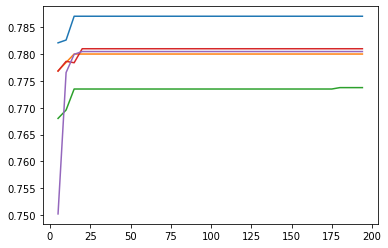

In [201]:
import matplotlib.pyplot as plt
plt.plot(a, b)
plt.show()

## From the plot, what is the optimal # of features, what are these features? (2pts)

Based on the plot above, the accuracy remains approximately constant from 25 to 200 features. These features were then ranked and sorted for the top 25 features which are ['city_development_index','x0_city_84',
 'x0_city_89',
 'x0_city_9',
 'x0_city_90',
 'x0_city_91',
 'x0_city_93',
 'x0_city_94',
 'x0_city_97',
 'x0_city_83',
 'x0_city_98',
 'x1_Male',
 'x1_Other',
 'x1_unknown',
 'x2_Full time course',
 'x2_Part time course',
 'x2_no_enrollment',
 'x3_Graduate',
 'x3_High School',
 'x0_city_99',
 'x0_city_82',
 'x0_city_81',
 'x0_city_80',
 'x0_city_59',
 'x0_city_61']

In [202]:
X_train.columns[rfecv.support_]

Index(['city_development_index', 'relevent_experience', 'x0_city_1',
       'x0_city_10', 'x0_city_100', 'x0_city_101', 'x0_city_102',
       'x0_city_103', 'x0_city_104', 'x0_city_105',
       ...
       'x7_Other', 'x7_Public Sector', 'x7_Pvt Ltd', 'x7_unknown', 'x8_1',
       'x8_2', 'x8_3', 'x8_4', 'x8_never', 'x8_unknown'],
      dtype='object', length=178)

In [213]:
temp_df = pd.DataFrame() 
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
temp_df = temp_df.sort_values(by=['rank'])
feat = list(temp_df['feature'].head(25))
feat

['city_development_index',
 'x0_city_84',
 'x0_city_89',
 'x0_city_9',
 'x0_city_90',
 'x0_city_91',
 'x0_city_93',
 'x0_city_94',
 'x0_city_97',
 'x0_city_83',
 'x0_city_98',
 'x1_Male',
 'x1_Other',
 'x1_unknown',
 'x2_Full time course',
 'x2_Part time course',
 'x2_no_enrollment',
 'x3_Graduate',
 'x3_High School',
 'x0_city_99',
 'x0_city_82',
 'x0_city_81',
 'x0_city_80',
 'x0_city_59',
 'x0_city_61']

## Build an SVM classifier that uses gridsearch and the selected features from RFE (3pts)

In [214]:
X1 = model_data[feat]
y1 = model_data['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape)
print(X1_test.shape)

(15326, 25)
(3832, 25)


In [215]:
model = SVC()
param_grid = {
    'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

search1 = GridSearchCV(model, param_grid,verbose=3)
search1.fit(X1_train, y1_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time=   8.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   8.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   8.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   8.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   7.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   7.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   7.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   7.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   7.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   7.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   7.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=1000, gamma=0.0001)

In [219]:
svm1_model = search1.best_estimator_
svm1_model

SVC(C=1000, gamma=1)

In [220]:
y1_pred = svm1_model.predict(X1_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y1_test,y1_pred)))
print('Precision: {:.2f}'.format(precision_score(y1_test,y1_pred)))
print('Recall: {:.2f}'.format(recall_score(y1_test,y1_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y1_test,y1_pred)))

Accuracy: 0.76
Precision: 0.54
Recall: 0.23
F1-Score: 0.33


## Compare Results of Baseline and using the Feature Selection Method, why do you think one performed better over the other? What would be your recommendation to improve the model performance? (5pts)

In [221]:
df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Baseline': [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred)],
    'RFE Model': [accuracy_score(y1_test,y1_pred), precision_score(y1_test,y1_pred), recall_score(y1_test,y1_pred), f1_score(y1_test,y1_pred)]
})
df

,Metric,Baseline,RFE Model
0,Accuracy,0.771138,0.760960
1,Precision,0.555556,0.543902
2,Recall,0.393908,0.234244
3,F1 Score,0.460971,0.327460


Based on the results, the baseline remains the better performing model. This may be attributed to the limited number of features out of 194 features originally which may have resulted in some data loss. But it can be said that the gains are indirectly propotional to the computational power and time required for the baseline model. To improve the model performance, it is recommended that the data be improved and completed. Besides that, it is also recommended that different algorithms be used and compared.